In [3]:
import numpy as np

## load data
data = np.loadtxt("./data/logistic_r.txt", delimiter=",")
X, y = data[:, 0:2], data[:, 2]
m, n = X.shape

## expand dimention for theta0
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [4]:
## sigmod
def sigmoid(z):
  g = 1 / (1 + np.exp(-z));
  return g

In [5]:
## test -> sigmod
g = sigmoid(np.array([0, 1]))
print(g)

[0.5        0.73105858]


In [6]:
## Cost Function
def costFunction(theta, X, y):
  m = y.size
  c = -1 / m;
  h = sigmoid(np.dot(X, theta.transpose()))
  cost = 0
  grad = np.zeros(theta.shape)
  for i in range(m):
    cost += (y[i] * np.log(h[i]) + (1 - y[i]) * np.log(1 - h[i]))
  cost *= c
  
  for j in range(X.shape[1]):
    tmp = 0
    for iter in range(m):
      tmp += (h[iter] - y[iter]) * X[iter][j] / m
    grad[j] = tmp 
    
  return cost, grad

In [7]:
## test -> Cost Function
theta = np.zeros(3)
cost, theta = costFunction(theta, X, y)
print(cost)
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*theta))
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)
print(cost)
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))

0.693147180559946
	[-0.1000, -12.0092, -11.2628]
0.21833019382659782
	[0.0429, 2.5662, 2.6468]


In [8]:
## use scipy minimize
from scipy import optimize

## max iterater times
opts= {'maxiter': 400}
theta = np.zeros(3)

res = optimize.minimize(costFunction, 
                        theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options = opts)
cost = res.fun
theta_res = res.x
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta_res))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


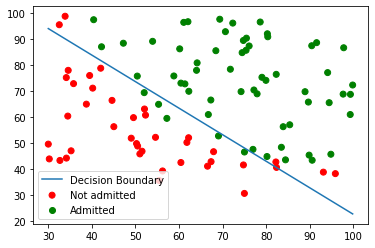

In [15]:
# // visualization
import matplotlib.pyplot as plt
plot_x = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
plot_y = -1. / theta_res[2] * (theta_res[0] + theta_res[1] * plot_x)

map_color = {0: 'r', 1: 'g'}
color = list(map(lambda x: map_color[x], y))
plt.scatter(X[:,1], X[:,2],  c=color)
plt.scatter([], [], c='g')
plt.plot(plot_x, plot_y)
plt.legend(["Decision Boundary", "Not admitted", "Admitted"])